# Investigating win rate vs the initial number of marbles
* Player 1 strategy min_max
* Player 2 strategy: min_max

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#data = pd.read_csv('../data/win_rate_vs_n_marbles_minmax_minmax.csv')
data = pd.read_csv('../data/win_rate_vs_n_marbles_random_random.csv')

n_marbles = data['init_marbles'].unique()

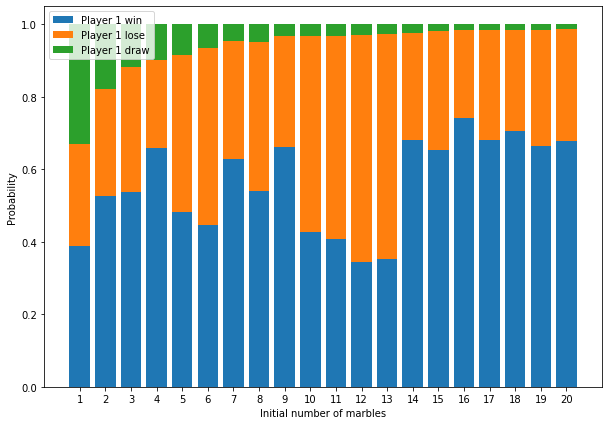

In [10]:
probs = pd.DataFrame(columns=['win', 'lose', 'draw'], index=n_marbles, dtype=float)

for n in n_marbles:
    view = data[ data['init_marbles'] == n ]
    norm = len(view)

    probs['win'].loc[n]   = len(view[ view['player_1_result'] == 'win' ]) / norm
    probs['lose'].loc[n]  = len(view[ view['player_1_result'] == 'lose' ]) / norm
    probs['draw'].loc[n]  = len(view[ view['player_1_result'] == 'draw' ]) / norm
    
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.bar(probs.index, probs['win'],  label='Player 1 win')
ax.bar(probs.index, probs['lose'], label='Player 1 lose', bottom=probs['win'])
ax.bar(probs.index, probs['draw'], label='Player 1 draw', bottom=probs['win']+probs['lose'])

ax.set_xlabel('Initial number of marbles')
ax.set_ylabel('Probability')
ax.legend(loc='best')
ax.set_xticks(n_marbles)

plt.show()

Text(0, 0.5, 'Count / bin')

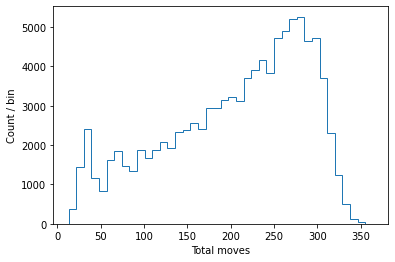

In [ ]:
fig, ax = plt.subplots()
ax.hist(data['total_moves'], bins=40, histtype='step')
ax.set_xlabel('Total moves')
ax.set_ylabel('Count / bin')

# Win probabilities

In [ ]:
def calculate_prob(data, column, value):
    """ Calculates probability of column == value """
    return len(data[data[column] == value]) / len(data)

player_1_win_prob  = calculate_prob(data, 'player_1_result', 'win')
player_1_lose_prob = calculate_prob(data, 'player_1_result', 'lose')
player_1_draw_prob = calculate_prob(data, 'player_1_result', 'draw')
print(player_1_win_prob, player_1_lose_prob, player_1_draw_prob)

0.56031 0.37778 0.06191


# Number of moves for each game result

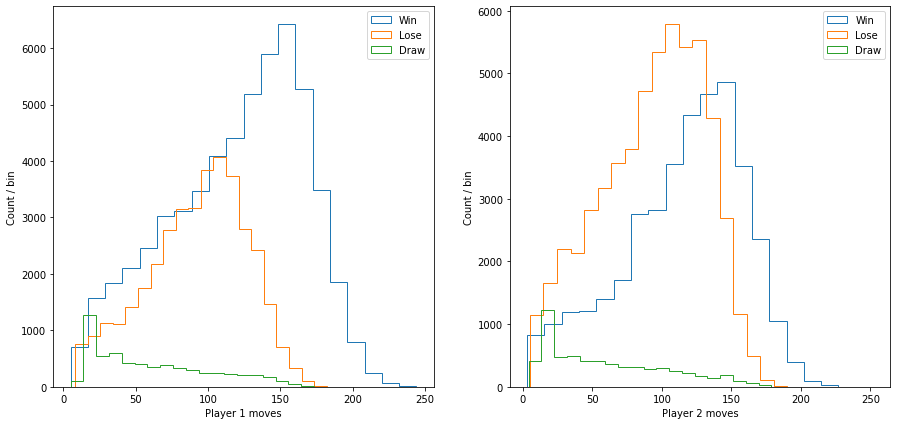

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].hist(data[data['player_1_result'] == 'win']['player_1_moves'], label='Win', bins=20, histtype='step')
ax[0].hist(data[data['player_1_result'] == 'lose']['player_1_moves'], label='Lose', bins=20, histtype='step')
ax[0].hist(data[data['player_1_result'] == 'draw']['player_1_moves'], label='Draw', bins=20, histtype='step')
ax[0].set_xlabel('Player 1 moves')
ax[0].set_ylabel('Count / bin')
ax[0].legend()

ax[1].hist(data[data['player_2_result'] == 'win']['player_2_moves'], label='Win', bins=20, histtype='step')
ax[1].hist(data[data['player_2_result'] == 'lose']['player_2_moves'], label='Lose', bins=20, histtype='step')
ax[1].hist(data[data['player_2_result'] == 'draw']['player_2_moves'], label='Draw', bins=20, histtype='step')
ax[1].set_xlabel('Player 2 moves')
ax[1].set_ylabel('Count / bin')
ax[1].legend()